In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# fix this eventually
import sys
sys.path.insert(0, "../codebase")

from step_response import compute_step_response_cp, fit_all_curves

In [2]:
static_temp_corr = 156.6 - 145.6

# location of folder containing data
path_base = Path("../Data/tests/")

# data file(s)
prist_1s_400 = path_base / "XENE19 58850 calvin PET dyn106-26 1s 400Ks-1 20251120.txt"

In [3]:
# adjust to experiment parameters
window = 10000
sampling_freq = 1e4

# compute Cp                                                optional, defaults to 0
cp_data, T = compute_step_response_cp(prist_1s_400, window, static_temp_corr)

# fit gaussian to curves and extract inflection points (dynamic Tg). 
# p0 is optional, see documentation for default fitting parameters
Tg_dyn, stop = fit_all_curves(T, cp_data, window, p0=None)

# calculate frequency array
# window/sampling_freq = period
frequencies = (1/(window/sampling_freq)) * np.arange(1, stop)

Error:
  Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
encountered after 497 iterations


/home/crc/Documents/PhD/Delta Env/experiments/FlashDSC/notebooks/../codebase/step_response.py:100: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(gaussian, x, y, p0=p0)


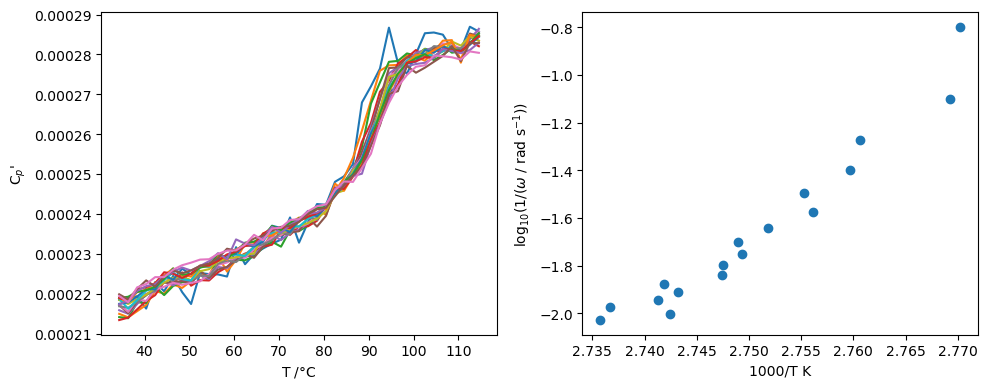

In [5]:
# choose how many frequencies to use
cut = 17

# plot real part of Cp vs T
fig, axs = plt.subplots(1, 2, figsize=(10,4))
for i in range(1, cut+1):
    axs[0].plot(T, np.abs(cp_data[:,i]))

# cut T and freq arrays to desired number of frequencies
Tg_dyn_cut = Tg_dyn[:cut]+273.15   # convert to Kelvin
f_cut = frequencies[:cut]

# plot chosen frequencies as omega vs 1000/T
axs[1].plot(1000/Tg_dyn_cut, np.log10(1/(2*np.pi*f_cut)), 'o')
axs[1].set_xlabel("1000/T K")
axs[1].set_ylabel("log$_{10}$($1 / (\\omega$ / rad s$^{-1}$))")
axs[0].set_xlabel("T /$\\degree$C")
axs[0].set_ylabel("C$_p$'")
fig.tight_layout()
plt.show()

In [8]:
# export data to CSV using pandas
# first col is temperatures of each step
all_data = pd.DataFrame({"T": T})
for i in range(cut):
    Cp_col = cp_data[:,i+1]
    Tg_dyn = Tg_dyn_cut[i]
    freq = frequencies[i]
    
    all_data[f"Cp_{i+1}"] = pd.Series(Cp_col)
    all_data[f"Tg_dyn_{i+1}"] = pd.Series([Tg_dyn])
    all_data[f"freq_{i+1}"] = pd.Series([freq])

all_data.to_csv("step_response.csv", index=False)